In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix
 

In [54]:
results = pd.read_csv("/home/divya/Documents/results.csv")


In [55]:
# y_true = results.loc[:,'Actual']
y_true=[]
for i in range (len(results['Actual'])):
    y_true.append(results['Actual'][i])
# y_true = results['Actual']
print(y_true)


['H', 'A', 'D', 'H', 'D', 'A', 'H', 'D', 'A', 'H', 'H', 'A', 'D', 'H', 'H', 'A', 'D', 'H', 'D', 'D', 'H', 'A', 'A', 'A', 'A', 'A', 'H', 'A', 'A', 'D', 'D', 'D', 'H', 'H', 'H', 'D', 'H', 'A', 'H', 'D']


In [56]:
# y_true = results.loc[:,'Actual']
y_pred=[]
for i in range (len(results['Predicted'])):
    y_pred.append(results['Predicted'][i])
# y_true = results['Actual']
print(y_pred)

['H', 'A', 'H', 'H', 'A', 'H', 'H', 'H', 'A', 'H', 'H', 'A', 'A', 'H', 'H', 'A', 'H', 'H', 'H', 'A', 'A', 'A', 'H', 'H', 'H', 'A', 'H', 'A', 'H', 'H', 'A', 'H', 'H', 'H', 'H', 'H', 'H', 'A', 'H', 'H']


In [57]:
classes = ['H','A','D']

confusion_matrix(y_true, y_pred, labels=['H', 'A', 'D'])

array([[14,  1,  0],
       [ 5,  8,  0],
       [ 8,  4,  0]])

In [58]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix
[[14  1  0]
 [ 5  8  0]
 [ 8  4  0]]


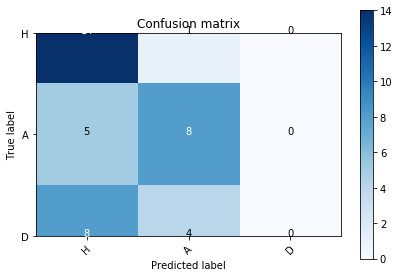

In [59]:
cnf_matrix=confusion_matrix(y_true, y_pred, labels=['H', 'A', 'D'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['H', 'A', 'D'],
                      title='Confusion matrix')

In [60]:
accuracy_score(y_true,y_pred)

0.55

In [61]:
from sklearn.metrics import precision_recall_fscore_support as score
classification_report(y_true,y_pred,target_names = classes)

'              precision    recall  f1-score   support\n\n           H       0.62      0.62      0.62        13\n           A       0.00      0.00      0.00        12\n           D       0.52      0.93      0.67        15\n\n    accuracy                           0.55        40\n   macro avg       0.38      0.52      0.43        40\nweighted avg       0.39      0.55      0.45        40\n'

In [62]:
precision,recall,fscore,support=score(y_true,y_pred)
print('Precision : {}'.format(precision))
print('Recall    : {}'.format(recall))
print('F-score   : {}'.format(fscore))
print('Support   : {}'.format(support))

Precision : [0.62 0.   0.52]
Recall    : [0.62 0.   0.93]
F-score   : [0.62 0.   0.67]
Support   : [13 12 15]
